# Ciclo 02: Aprendizado Supervisionado - Cassificacao

### 0.0 Installs

In [3]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.4 MB/s eta 0:00:00a 0:00:01


### 1.0 Import libraries

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt

### 1.1 Load Dataset

In [2]:
dataset_path = '../datasets/train.csv'
df = pd.read_csv(dataset_path)

In [3]:
df.head()

,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros,investe_exterior,pessoa_polit_exp,limite_adicional
0,1767,21,278.172008,2577.05,24196.89636,104.306544,31.038763,6,5,7,21,14,9,15,Não,Não,Negar
1,11920,40,268.874152,2465.39,19227.37796,69.858778,36.917093,5,8,5,40,23,10,18,Não,Não,Negar
2,8910,36,446.643127,1055.29,42822.28223,134.201478,34.561714,0,3,6,26,13,3,15,Sim,Não,Negar
3,4964,58,321.141267,703.05,51786.82600,297.350067,31.493561,0,3,7,12,7,2,1,Sim,Não,Negar
4,10100,35,428.716114,891.29,44626.85346,134.201478,28.028887,2,8,7,24,10,8,20,Sim,Não,Negar


In [4]:
df.loc[:, 'limite_adicional'].unique()

array(['Negar', 'Conceder'], dtype=object)

### 2.0 Selecao de Features

In [5]:
features = ['idade', 'saldo_atual', 'divida_atual', 'renda_anual', 'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = 'limite_adicional'

x_train = df.loc[:, features]
y_train = df.loc[:, label]

### 3.0 Treinamento

In [6]:
# definicao de parametros do treinamentos 
k = 7
knn_classifier = KNeighborsClassifier( n_neighbors = k )

#treinamento
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [7]:
y_pred = knn_classifier.predict(x_train)

In [8]:
df_result = df.copy()
df_result['classificacao'] = y_pred

In [9]:
df_result.loc[:, ['id_cliente', 'idade', 'limite_adicional', 'classificacao']].sample(10)

,id_cliente,idade,limite_adicional,classificacao
3825,5941,33,Negar,Negar
8329,8646,23,Negar,Negar
4078,713,25,Conceder,Conceder
8081,9639,49,Negar,Negar
5663,301,53,Conceder,Negar
1497,7524,54,Negar,Negar
560,2865,40,Negar,Negar
8153,5163,44,Conceder,Negar
4282,7653,25,Negar,Negar
1500,3316,33,Negar,Negar


### 4.0 Performance

In [10]:
df_result.loc[:, 'limite_adicional'].value_counts( normalize=True)
#Dados nao balanceados, logo a metrica da acuracia provavelmente nao e a melhor

Negar       0.841579
Conceder    0.158421
Name: limite_adicional, dtype: float64

In [11]:
df_result['acertos'] = (df_result.loc[:, ['id_cliente', 'limite_adicional', 'classificacao']]
                                 .apply(lambda x: 1 if x['limite_adicional'] == x['classificacao'] else 0, axis=1))
df_result.loc[:, ['id_cliente', 'idade', 'limite_adicional', 'classificacao']].sample(10)

,id_cliente,idade,limite_adicional,classificacao
1090,2997,25,Negar,Negar
1729,5420,32,Negar,Negar
7908,12497,49,Conceder,Negar
3060,12430,30,Negar,Negar
673,3709,35,Negar,Negar
6308,11468,506,Negar,Negar
1130,7608,52,Negar,Negar
6159,2918,34,Negar,Negar
9295,4459,32,Negar,Negar
3659,4852,50,Negar,Negar


In [12]:
df_result['acertos'].sum()

8161

In [13]:
df_result.shape

(9500, 19)

In [14]:
8161 / 9500

0.8590526315789474

In [15]:
print('Acuracia: {:.2f}%'.format(100 * 8161 / 9500))

Acuracia: 85.91%


### 4.1 Matriz de Confusao

In [16]:
mt.confusion_matrix( y_train, y_pred)

array([[ 369, 1136],
       [ 203, 7792]])

### 4.2 Acuracia

In [17]:
100 * (369 + 7792) / 9500

85.90526315789474

In [18]:
100 * mt.accuracy_score( y_train, y_pred )

85.90526315789474

### 4.3 Precision

In [19]:
mt.precision_score( y_train, y_pred, pos_label='Conceder')
#Quando o average e binary (dois labels) deve ser informado o pos_label (label positivo)

0.6451048951048951

### 4.4 Recall

In [20]:
mt.recall_score( y_train, y_pred, pos_label='Conceder')
#Quando o average e binary (dois labels) deve ser informado o pos_label (label positivo)

0.24518272425249169

### 5.0 Exercicios

#### Exercicios 1, 2 e 5

In [31]:
df['limite_adicional'].unique()

array(['Negar', 'Conceder'], dtype=object)

In [75]:
ks = [3,5,7,9,11,13,15]
accuracies = []
precisions_negar = []
precisions_conceder = []
recalls_negar = []
recalls_conceder = []
for i in ks:
    knnc = KNeighborsClassifier(n_neighbors = i)
    knnc.fit(x_train, y_train)
    y_pred = knnc.predict(x_train)
    accuracies.append(mt.accuracy_score(y_train, y_pred))
    precisions_negar.append(mt.precision_score(y_train, y_pred,pos_label='Negar'))
    precisions_conceder.append(mt.precision_score(y_train, y_pred,pos_label='Conceder'))
    recalls_negar.append(mt.recall_score(y_train, y_pred,pos_label='Negar'))
    recalls_conceder.append(mt.recall_score(y_train, y_pred,pos_label='Conceder'))

In [76]:
import matplotlib.pyplot as plt

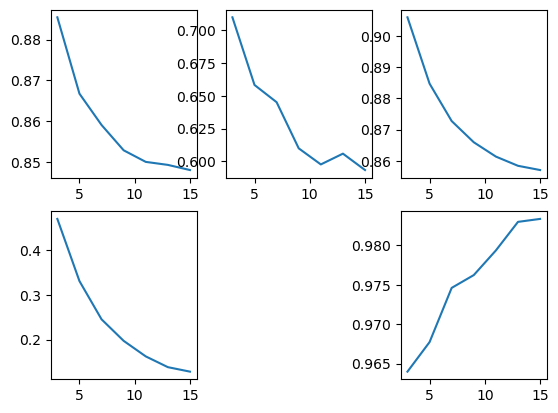

In [77]:
fig, axs= plt.subplot_mosaic([['acc','prec','pren'],
                              ['recc', '.','recn']])
acc, prec, pren, recc, recn = axs.values()
acc.plot(ks, accuracies)
prec.plot(ks, precisions_conceder)
pren.plot(ks, precisions_negar)
recc.plot(ks, recalls_conceder)
recn.plot(ks, recalls_negar)

In [78]:
print('O melhor valor de k com base na accuracia e %d' %  ks[accuracies.index(max(accuracies))]) 

O melhor valor de k com base na accuracia e 3


#### Exercicio 3

A metrica acuracia aponta a acuracia do modelo em prever todos os casos... Ela simplesmente faz a soma do total de acertos e divide pelo total de predicoes.
O problema disso e que podem aver desbalanceamentos nos dados.
Por exemplo.: Digamos que tenhamos 200 labels A e apenas 10 lebals B as predicoes o modelo acerte todos os As e erre todos os Bs..
A accuracia aferida seria de 200/210 = 95%.
Porem digamos que o label B signifique que os casos de fraude de um banco concessor de creditos.
Podemos observar que apesar da acuracia de 95% do modelo o sistema FALHOU em 100% no momento de identificar os labels B.
Isso ocorre porque os labels estao desbalanceados. Existem muito mais labels A do que B nos dados de treino e neste caso possivelmente na realidade.

#### Exercicio 4

A metrica precisio mede a precisao dos dados preditos pelo algoritipo. Ou seja, de todas as predicoes de labels A, quantas estavam corretas?
Ja a metrica de recall mede a capacidade do modelo de identificar determinado label. Ou seja, de todos os labels A existentes, quantos o modelo identificou? 

#### Exercicio 6

P (Positivo) sao todos os valores de um dos labels, seja qual for  o escolhido para ser o P e o outro label sera o N (Negativo).
TP sao os positivos que o modelo identificou como positivo
FP sao os negativos que o modelo identificou como positivo
TN sao os negativos que o modelo identificou como negativo
FN sao os positivos que o modelo identificou como positivo

#### Exercicio 7

Sim, existem duas.
A unica premissa do KNN e de que as features utilizadas para a predicao devem ser dados quantitativos.
No dataset informado existem duas features que nao sao quantitativos:
- investe_exteror
- pessoa_polit_exp